# House Pricing Regression using Dense Neural Network (DNN) 

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Upload and Explore Dataset
[The Boston house-price data](http://lib.stat.cmu.edu/datasets/boston) 
* This is a dataset taken from the StatLib library which is maintained at Carnegie Mellon University.
* There are 506 samples, each one with 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in USD 1,000).

 Variables in order:
 - CRIM     - per capita crime rate by town
 - ZN       - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    - proportion of non-retail business acres per town
 - CHAS     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      - nitric oxides concentration (parts per 10 million)
 - RM       - average number of rooms per dwelling
 - AGE      -proportion of owner-occupied units built prior to 1940
 - DIS      - weighted distances to five Boston employment centres
 - RAD      - index of accessibility to radial highways
 - TAX      - full-value property-tax rate per $10,000
 - PTRATIO  - pupil-teacher ratio by town
 - B        - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT    - % lower status of the population
 - MEDV     - Median value of owner-occupied homes in USD 1000's


*  Our goal is to build a regression model that takes these **13 features as input** and **output a single value prediction** of the "median value of owner-occupied homes (in USD 1000)."
* Dataset can be download direct from: [tf.keras.datasets.boston_housing](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data)


In [2]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

57344/57026 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404,)


In [4]:
print(y_test.shape)
print(y_test.shape)

(102,)
(102,)


### Exploring Target (Y)

In [5]:
print(y_train.min())
print(y_train.max())
print(y_train.mean())

5.0
50.0
22.395049504950492


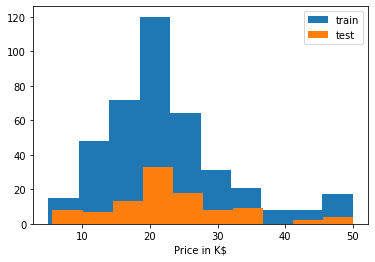

In [6]:
plt.hist(y_train, label='train')
plt.hist(y_test, label = 'test')
plt.xlabel('Price in K$')
plt.legend();

In [7]:
y_train[0]

15.2

In [8]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

### Exploring Input Features (X)

In [9]:
for i in range(len(x_train[0])):
  print("Feature {} ==> range from {} to {}".format(
      i, x_train[:,i].min(), x_train[:,i].max()
      )
  )

Feature 0 ==> range from 0.00632 to 88.9762
Feature 1 ==> range from 0.0 to 100.0
Feature 2 ==> range from 0.46 to 27.74
Feature 3 ==> range from 0.0 to 1.0
Feature 4 ==> range from 0.385 to 0.871
Feature 5 ==> range from 3.561 to 8.725
Feature 6 ==> range from 2.9 to 100.0
Feature 7 ==> range from 1.1296 to 10.7103
Feature 8 ==> range from 1.0 to 24.0
Feature 9 ==> range from 188.0 to 711.0
Feature 10 ==> range from 12.6 to 22.0
Feature 11 ==> range from 0.32 to 396.9
Feature 12 ==> range from 1.73 to 37.97


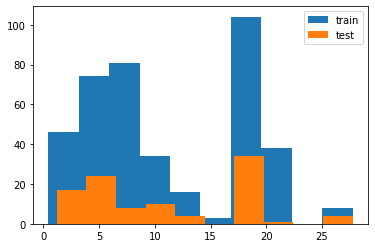

In [13]:
feature = 2
plt.hist(x_train[:,feature], label='train')
plt.hist(x_test[:,feature], label = 'test')
plt.legend();

In [18]:
print (x_train.max())
print (x_train.min())

711.0
0.0


### Preprocessing Data 

**Normalizing Data**: 
We notice that values range varies depending on the type of the feature. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1 (or at least with similar ranges), a process called 'normalizing'. In this case, all features will be `rescaled`.

The standard score of a sample `x` is calculated as:

        z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False` and `s` is the standard deviation of the training samples or one if `with_std=False`.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(x_train)

# then we call the transform method to scale both the training and testing data
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

Another way do normalize data directly with numpy is:
- Get per-feature statistics (mean, standard deviation) from the training set to normalize by:
  - x_train_mean = np.mean(x_train, axis=0)
  - x_train_std = np.std(x_train, axis=0)
  - x_train_norm = (x_train - x_train_mean) / x_train_std

  - x_test_norm = (x_test - x_train_mean) / x_train_std

**Note** that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

In [19]:
print (x_train_norm.max())
print (x_train_norm.min())

9.234847178400438
-3.8172503201932715


A sample output

In [15]:
print(x_train_norm[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


## Define Model

In [20]:
x_train.shape[1]

13

In [21]:
input_shape = x_train.shape[1]
input_shape

13

The model can also be created like this:
- [input layer] ==> [hiden layers] ==> [output layer]:
  - 13 ==> [20] ==> 1

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(input_shape),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                280       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Input layer has 13 conections, one for each feature [X]. Each feature goes to each one of the neurons of 1st Dense Layer, that has 20 Neurons. So, total parameters 1st Dense Layer will be ws=(13 x 20) + bs=20 ==> 280. The output layer will be only one Neuron that has one input from the output of previous layer (20 ) + 1 b ==> 21.

For simplicity, the input layer can be "merge with 1st layer"

In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape = [13]),
    tf.keras.layers.Dense(1)
    ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


##Compile Model

### Type of errors
In statistics, `Mean Absolute Error (MAE)` is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:


$$MAE=\frac{1}{n}\sum_{i=1}^{n}(\left|y_{i}-\hat{y}_{i}\right|)$$


Another alternative to evaluate regression is the `Root Mean Square Error (RMSE)`.
This is the root of the  mean of the squared errors. It is a most popular measure of regression model's performance because also keep the same unit as y and larger errors are noted more than with MAE.

$$RSME=\sqrt{\frac{1}{n}\sum_{i=1}^{n}{(y_{i}-\hat{y}_{i})}^2}$$

You can use MSE to calculate loss, but also tracking the MAE or RSME, once those values will have the "same order" of the Target (in the case, multiples of USD1,000).

The optimizer used is [ADAM](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam), a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments. The hyperparameter "Learning-Rate" used is the default ==> 0.001

In [24]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # used to monitor the training and testing steps.
    )

## Train the model

In [25]:
history = model.fit(
    x_train_norm, 
    y_train,
    epochs=1000, 
    verbose=0
    )

Inspecting the model

In [29]:
train_eval = model.evaluate(x_train_norm, y_train)
print ("Training data MAE: {:.2}".format(train_eval[1]))

13/13 [==============================] - 0s 1ms/step - loss: 5.0516 - mae: 1.5969
Training data MAE: 1.6


In [26]:
history.history.keys()

dict_keys(['loss', 'mae'])

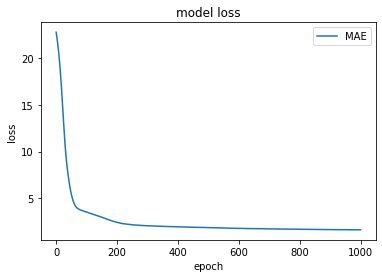

In [27]:
plt.plot(history.history['mae'], label='MAE')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
#plt.ylim([0,50])
plt.show()

## Testing the trained model



In [30]:
test_eval = model.evaluate(x_test_norm, y_test)
print ("Test data MAE: {:.2}".format(test_eval[1]))

4/4 [==============================] - 0s 3ms/step - loss: 16.2824 - mae: 2.5559
Test data MAE: 2.6


In [31]:
rsme = round(np.sqrt(test_eval[0]), 3)
rsme

4.035

The model has an RSME error of around USD4,000 and an MAE of around USD 2,600, what is very good for house's price estimation.  

Note: With features **not normalized**, we got loss (MSE): 22.0815; RSME: USD4,700 and  MAE: USD3,500

In [32]:
y_hat = model.predict(x_test_norm)
print(y_hat[:5])

[[ 8.365678]
 [17.696072]
 [22.021854]
 [36.15951 ]
 [24.284477]]


In [33]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

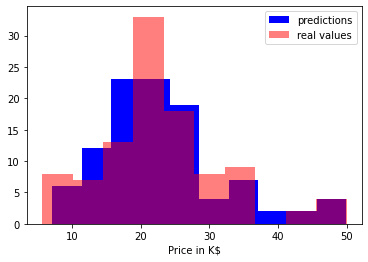

In [34]:
plt.hist(y_hat, label='predictions', color = 'b')
plt.hist(y_test, label = 'real values', color = 'r', alpha=0.5)
plt.xlabel('Price in K$')
plt.legend();